# **Optimization in customer retention: Strategy based on data to increase customer retention**

## **Summary**

This project develops a complete data analysis and predictive modelling pipeline using Python. It includes descriptive statistics of the variables, a classification machine learning model with its metrics, throughout the project multiple insights are uncovered and using that information, recommendations are given in order to increase customer retention.

## **Dataset composition**

The dataset is composed with 7043 observations, each observation represents a customer and each column contains customer´s attributes. The dataset includes information about:

- Customers who left within the last month, the column is called **Churn**
- Services that each customer has singed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies
- Customer account information: How long they've been a customer, contract, payment method, paperless billing, monthly charges and total charges
- Demografic information about customers: gender, age range, and if they have partners and dependents

## **Exploratory Data Analysis (EDA)**

### **Data integrity check**


In [1]:
## Loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset from github repository
url = "https://raw.githubusercontent.com/andresfelipe0711/churn-prediction/refs/heads/main/churn_dataset.csv"
churn = pd.read_csv(url)
display(churn.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Converting column names to lowercase and renaming specific columns for better readability
churn.columns = churn.columns.str.lower()

churn.rename(columns = {'customerid': 'customer_id',
                      'seniorcitizen': 'senior_citizen',
                      'phoneservice': 'phone_service',
                      'multiplelines': 'multiple_lines',
                      'internetservice': 'internet_service',
                      'onlinesecurity': 'online_security',
                      'onlinebackup': 'online_backup',
                      'deviceprotection': 'device_protection',
                      'techsupport': 'tech_support',
                      'streamingtv': 'streaming_tv',
                      'streamingmovies': 'streaming_movies',
                      'paperlessbilling': 'paperless_billing',
                      'totalcharges': 'total_charges',
                      'paymentmethod': 'payment_method',
                      'monthlycharges': 'monthly_charges'
                      }, inplace = True)

In [4]:
# Converting total charges to numeric, forcing errors to NaN
churn['total_charges'] = pd.to_numeric(churn['total_charges'], errors='coerce')

In [5]:
# Converting churn column to binary

churn['churn'] = churn['churn'].map({'Yes': 1, 'No': 0})

# information of the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

The dataset has consistency in its data types, values, and ranges. Furthermore, no more data cleaning is completed.

### **Descriptive statistics**

The descriptive statistics will be divided in four sections: The demografic information, the customer account information, the services that the customers signed up for and lastly, a holistic analysis across all the variables. The reason division is to deeply understand the customers behaviour, their preferences, the different groups and type of customers that sign for the services, and to know if there is a pattern across the customers that have churned.

#### **Demografic information**

The demografic information is composed by:

1. The gender (Object dtype: Male or Female)
2. Senior citizen (Int dtype: 1 - Is a Senior, 0 - Not a Senior)
3. Partner (Object dtype: Yes or No)
4. Dependents (Object dtype: Yes or No)

In [6]:
print(churn.value_counts('churn', normalize = True))

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


**Key problem: Near 27% of the customers have churned in the last month**

In [7]:
print(churn.value_counts('gender', normalize = True))

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64


In [8]:
sns.set_palette('Paired') # Setting the color palette for the analysis

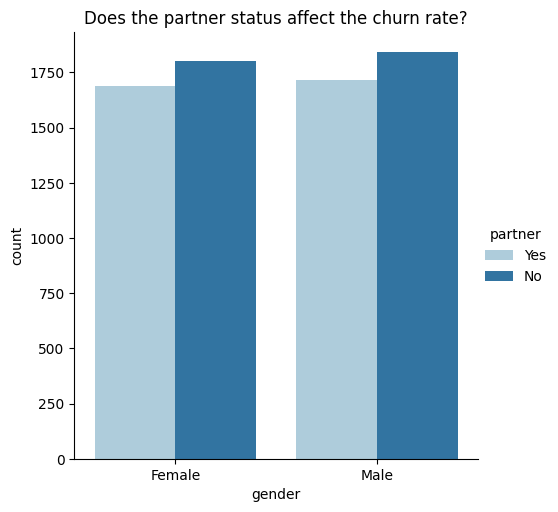

In [9]:
sns.catplot(hue='partner',
            x='gender',
            kind='count', data=churn)
plt.title('Does the partner status affect the churn rate?')
plt.show()

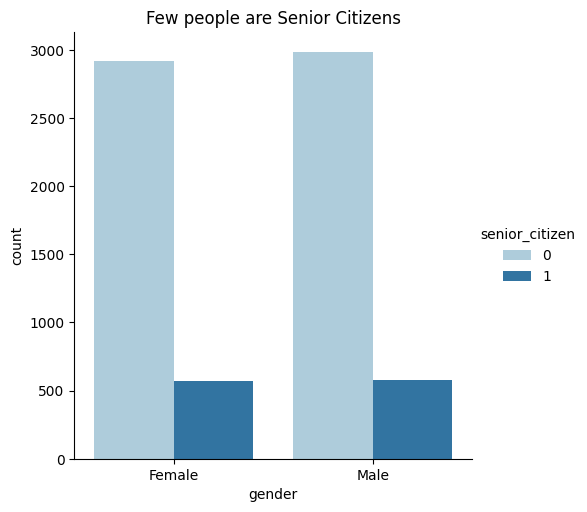

In [10]:
sns.catplot(hue='senior_citizen',
            x = 'gender',
            kind='count', data=churn)
plt.title('Few people are Senior Citizens')
plt.show()

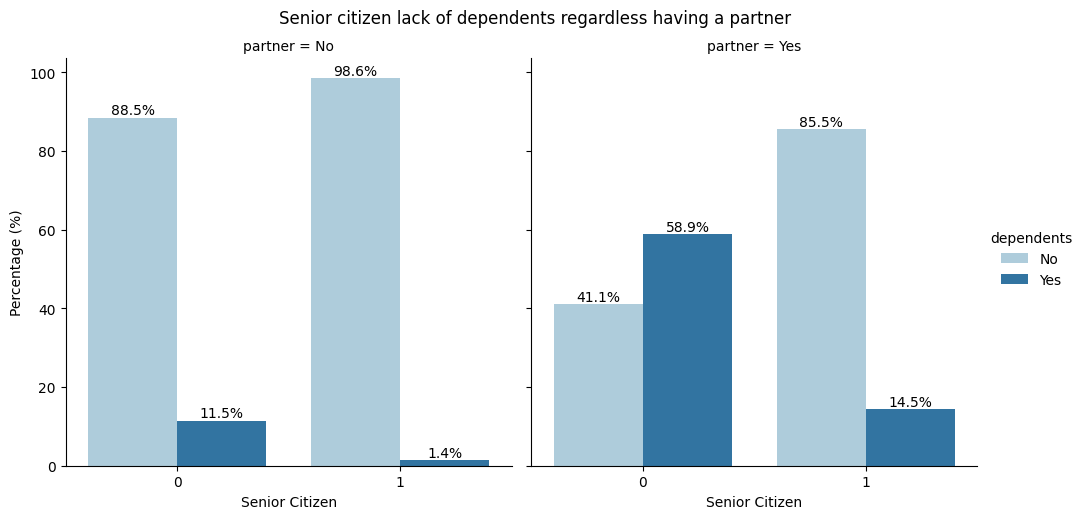

In [11]:
df_pct = (churn
          .groupby(['partner', 'senior_citizen'])['dependents']
          .value_counts(normalize=True)
          .rename('percentage')
          .mul(100)
          .reset_index())

g = sns.catplot(
    x='senior_citizen', 
    y='percentage', 
    hue='dependents', 
    kind='bar', 
    col='partner', 
    data=df_pct)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

g.set_axis_labels("Senior Citizen", "Percentage (%)")
plt.suptitle('Senior citizen lack of dependents regardless having a partner', y=1.03)
plt.show()

After an initial deep dive into the customer database, i have uncovered key patterns that define the audience´s structure:

**1. Scale of the change:** The churn rate is near 27%, more than a statistic it represents a massive retention opportunity. By identifying what drives this specific group to leave, we can implement targeted interventions that directly impact the company's bottom line.

**2. Audience composition:** The customer base is remarkably balanced in terms of gender, suggesting that retention strategies do not need to be gender-specific. However, a clear profile emerges: our users are predominantly younger individuals (non-senior citizens), many of whom are currently single.

**3. Family anchor:** There is a strong correlation between the lack of dependents and customer churn. Single customers tend to have no dependents, granting them the flexibility to switch providers without the friction of affecting a household plan. In addition, A critical data point is that 85.5% of Seniors with a partner have NO dependents. This is a Strategic Insight because while younger couples often have dependents (58.9%), which acts as a "service anchor". Seniors appear to be in an "Empty Nest" life stage. This makes them a highly sensitive segment with fewer contractual ties, making them more likely to churn in response to competitor offers.

#### **Customer account information**

The customer account information is composed by:

1. Contract (Object dtype: Month to month,  One year, Two year)
2. Payment method (Object dtype: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
3. paperless billing (Object dtype: Yes or No)
4. Monthly charges (float 64 dtype)
5. Total charges (float 64 dtype)
6. Tenure (int 64 dtype)




In [12]:
print(churn['contract'].value_counts(normalize=True))

contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64


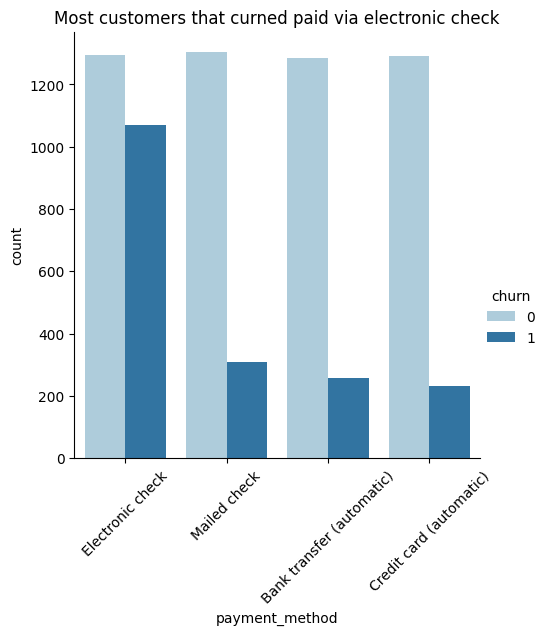

In [13]:
sns.catplot(x = 'payment_method',
            hue='churn', 
            kind='count', data=churn)
plt.title('Most customers that curned paid via electronic check')
plt.xticks(rotation = 45)
plt.show()

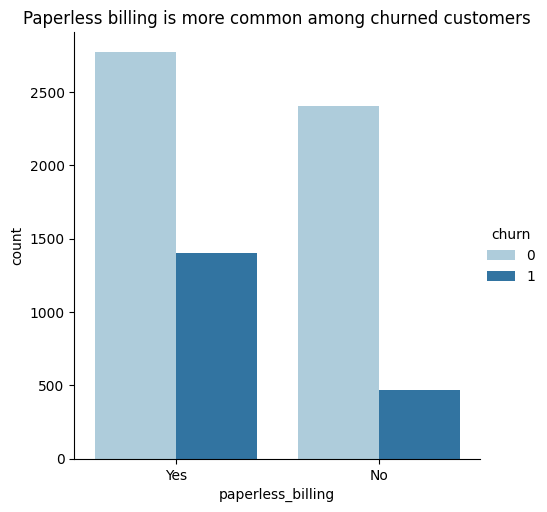

In [14]:
# Plotting monthly charges by payment method and churn status with percentage labels
sns.catplot(x='paperless_billing',
            hue='churn',
            kind='count', data=churn)
plt.title('Paperless billing is more common among churned customers')
plt.show()

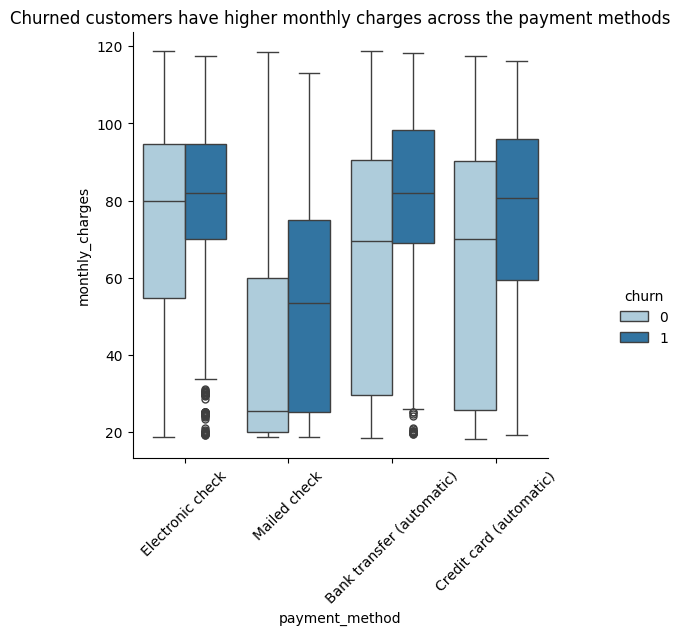

In [15]:
sns.catplot(x='payment_method',
            y='monthly_charges',
            hue = 'churn',
            kind='box', data=churn)
plt.title('Churned customers have higher monthly charges across the payment methods')
plt.xticks(rotation = 45)
plt.show()

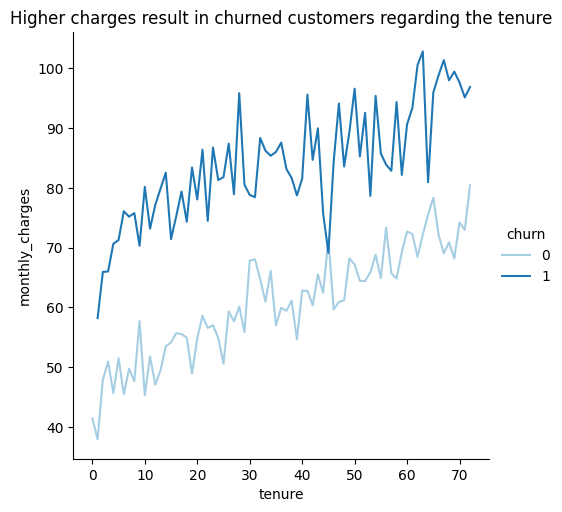

In [16]:
sns.relplot(x = 'tenure',
            y = 'monthly_charges',
            hue = 'churn',
            kind='line',
            errorbar=None,
            data = churn)
plt.title('Higher charges result in churned customers regarding the tenure')
plt.show()

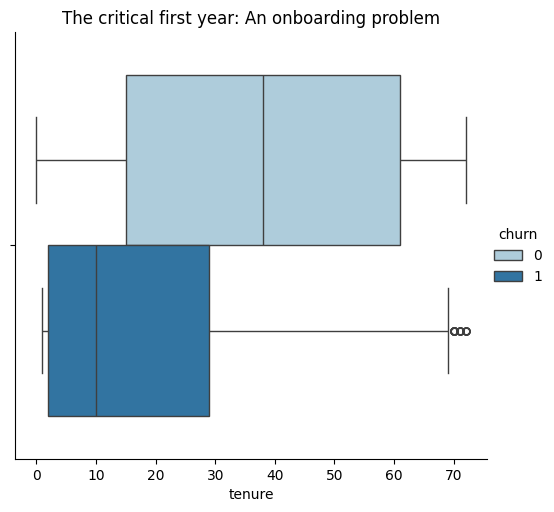

In [17]:
sns.catplot(x = 'tenure',
            kind='box',
            hue = 'churn', data = churn)
plt.title('The critical first year: An onboarding problem')
plt.show()

Looking at the customer account information, i uncovered the following insights:

**1. Electronic check as a friction point:** Most of the customers that churned paid via electronic check. These could happen due to multiple reasons. While an electronic check is easy to set up, it takes 3-5 business days to clear, this leads to problems for both the customer and the vendor. On the customer end, if they send the payment just before the cut off time, by the moment the vendor receives the money they will be overdue, and that results in possible service interruptions. On the other hand, the vendor may only discover an eCheck has bounced (due to insufficient funds or fraud) after 3-5 business days afther they already provided the service, resulting in a loss. These interactions may result in a lack of satisfaction for the customer and lastly, churning.

**2. Paperless billing is more common in the customers that churned:** Paperless billing is a method where customers receive their monthly statements and invoices electronically rather than as physical documents in the mail, it can also result in churning due to several reasons: Digital alerts can be easily overlooked in email inboxes or filtered into spam, leading to forgotten payments, also, customers may be unaware their registered cards have expired or that they have insufficient funds, leading to service disruptions and eventual churn.

**3. Price sensitivity:** In an industry where multiple vendors offer similar service, the price might be a deal breaker for some customers, and if they feel they are overpaying for a service that they can receive for less money, that will result in churn. In average, the customers that have the highest monthly charges are the ones who are churning the most. And among the type of payments, the bank customers who have automatic payments are the ones that pay the most.

**4. Monthly charges as a churning factor:** Customers who leave are consistently charged $20 to $30 more per month than those who stay. regardless of how long they've been with the company. Churn is not just about bad service; it is a rational economic reaction to being overcharged. The company is effectively "pricing out" a quarter of our customer base, loyalty cannot be bought if the price gap is too wide. A long-term customer paying "premium" rates is a "at-risk" customer waiting for a better offer.

**5. Time as a loyalty factor:** Most churn occurs within the first 10 to 12 months of service. This suggests that the "Onboarding" phase and the first year of experience are failing to lock in customer value, on the other hand, customers who stay past the 24-month mark show a significantly higher probability of long-term retention. Their median tenure is nearly 4x higher than those who churn.

#### **Services information**

The services information is composed by:

1. Phone service (Object dtype: Yes or No)
2. Multiple lines (Object dtype: Yes, No or No phone service)
3. Internet service (Object dtype: Fiber optic, DSL or No internet service)
4. Online security (Object dtype: Yes, No or No internet service)
5. Online backup (Object dtype: Yes, No or No internet service)
6. Device protection (Object dtype: Yes, No or No internet service)
7. Tech support (Object dtype: Yes, No or No internet service)
8. Streaming tv (Object dtype: Yes, No or No internet service)
9. Streaming movies (Object dtype: Yes, No or No internet service)

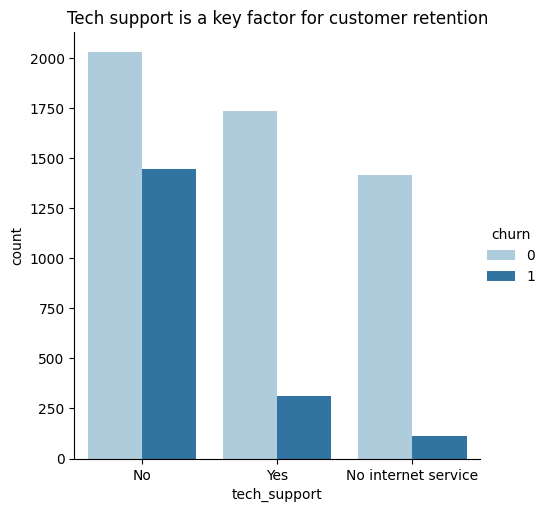

In [18]:
sns.catplot(x = 'tech_support',
            hue='churn',
            kind='count', data=churn)
plt.title('Tech support is a key factor for customer retention')
plt.show()

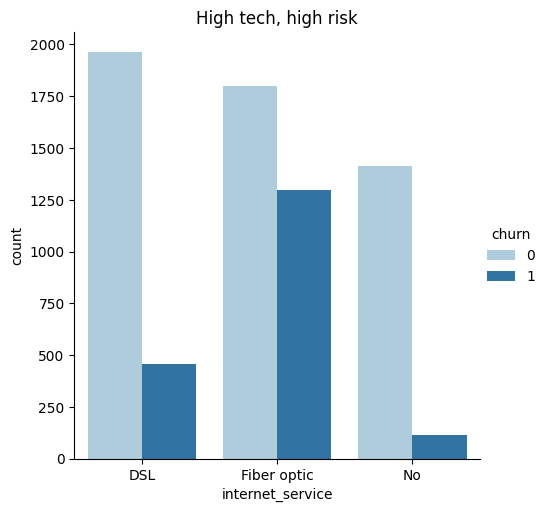

In [19]:
sns.catplot(x = 'internet_service',
            hue='churn',
            kind='count', data=churn)
plt.title('High tech, high risk')
plt.show()

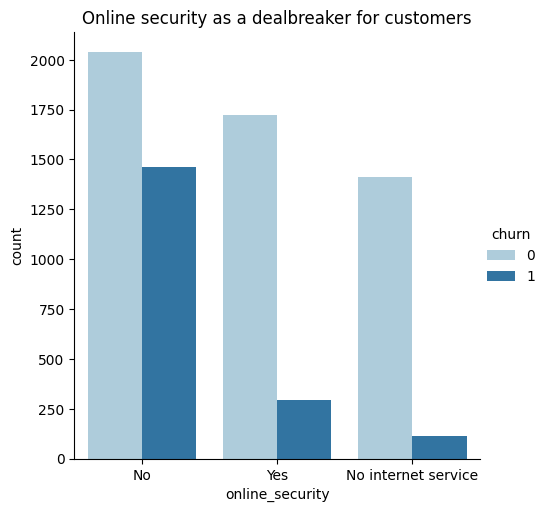

In [20]:
sns.catplot(x = 'online_security',
            hue='churn',
            kind='count', data=churn)
plt.title('Online security as a dealbreaker for customers')
plt.show()

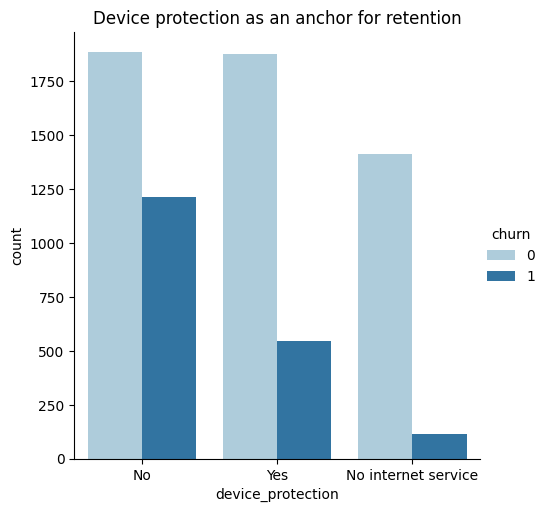

In [21]:
sns.catplot(x = 'device_protection',
            hue='churn',
            kind='count', data=churn)
plt.title('Device protection as an anchor for retention')
plt.show()

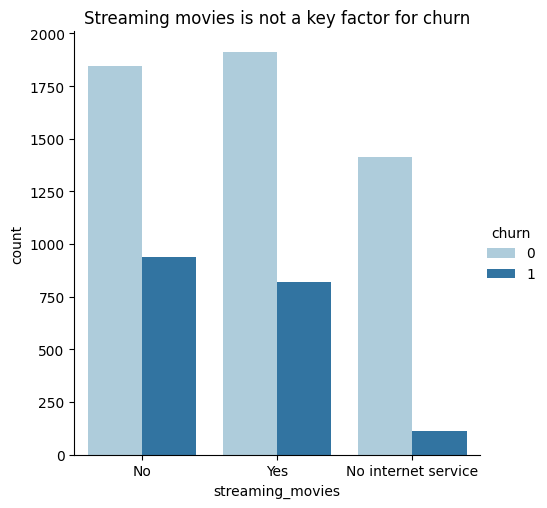

In [22]:
sns.catplot(x = 'streaming_movies',
            hue='churn',
            kind='count', data=churn)
plt.title('Streaming movies is not a key factor for churn')
plt.show()

Looking at the services information, the insights that were uncovered were:

**1. Fiber optic as a churn catalyst:** Despite being the high speed service, the users of fiber optic are the most likely to leave the company. The churn volume in this segment is significantly higher than in any other category.


**2. Customer service is extremely important:** The lack of support is a turning point for a customer, it is important to have post-sale service and support when the customer needs. This will lead to a satisfied customer that don´t feel the need to leavehttps://www.notion.so/55dc1725fa6d44708 the company because it always has support.

**3. Security is a must:** Not having online security or device protection is a deal breaker for customers. When a customer without protection experiences hardware failure or damage, they face the full cost of repair or replacement. This financial friction often becomes the final trigger for them to cancel the service entirely. In addition, when a customer opts is for the device protection or the online security they are signaling a long term commitment to the company.

#### **Holistic Analysis: Connecting the dots**

After a deep dive in each category of the data, a holistic analysis is performed to know the relationship between each category and how the interaction of the categories influence the customer behaviour and its churning.

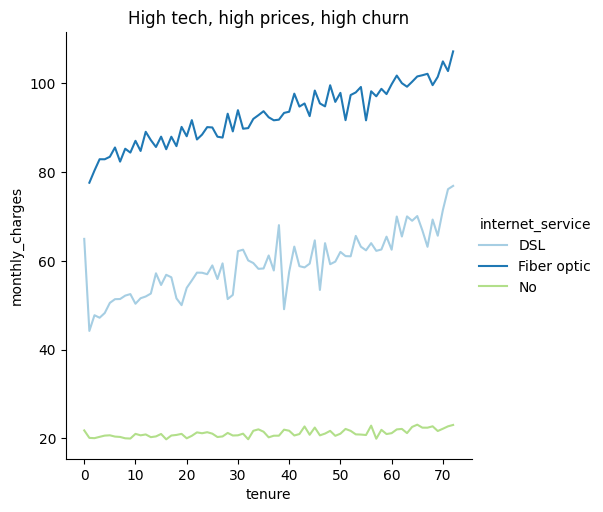

In [23]:
sns.relplot(x='tenure',
            y='monthly_charges',
            hue = 'internet_service',
            kind='line', errorbar = None,data=churn)
plt.title('High tech, high prices, high churn')
plt.show()

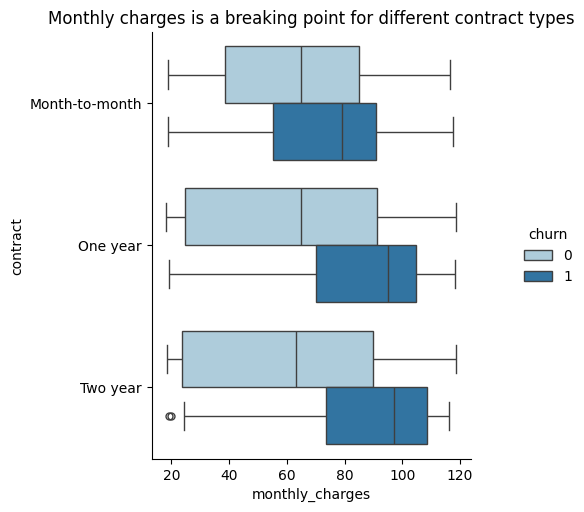

In [24]:
sns.catplot(x='monthly_charges',
            y='contract',
            kind = 'box',
            hue = 'churn',
            data=churn)
plt.title('Monthly charges is a breaking point for different contract types')
plt.show()

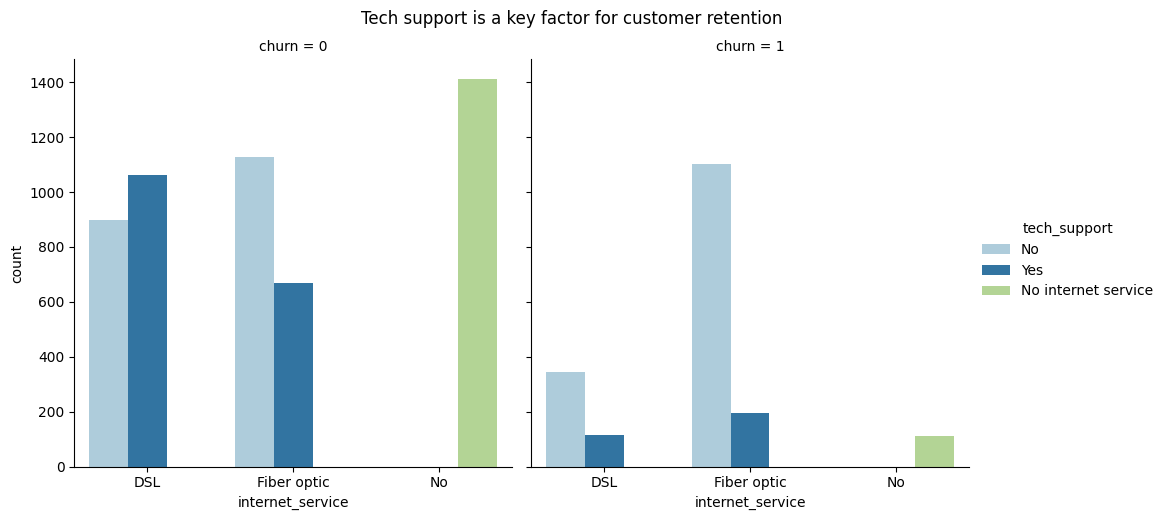

In [25]:
sns.catplot(x = 'internet_service',
            hue = 'tech_support',
            col = 'churn',
            kind='count', data=churn)
plt.suptitle('Tech support is a key factor for customer retention', y = 1.03)
plt.show()

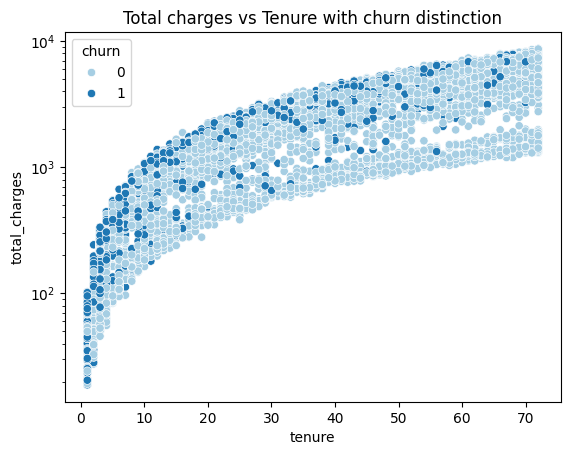

In [26]:
sns.scatterplot(x='tenure',
                y='total_charges',
                hue='churn',
                data=churn)
plt.yscale('log')
plt.title('Total charges vs Tenure with churn distinction')
plt.show()

My final multivariate analysis has uncovered the primary root cause of churn: The Premium Friction Triangle.

**1. High-Tech, No Support:** Fiber Optic is the most expensive service ($80-$100+ range). However, churn in this segment is almost exclusively concentrated among customers who lack Tech Support. The company is selling a complex, high-priced product without the necessary safety net.

**2. The $80 Breaking Point:** Across all contract types, there is a clear "price ceiling." For month-to-month subscribers, exceeding $80/month drastically increases the likelihood of exit.

**3. Revenue Loss:** The business is failing to convert high-monthly-revenue customers into long-term total value. the company is attracting high-spenders but losing them before they reach their second year.

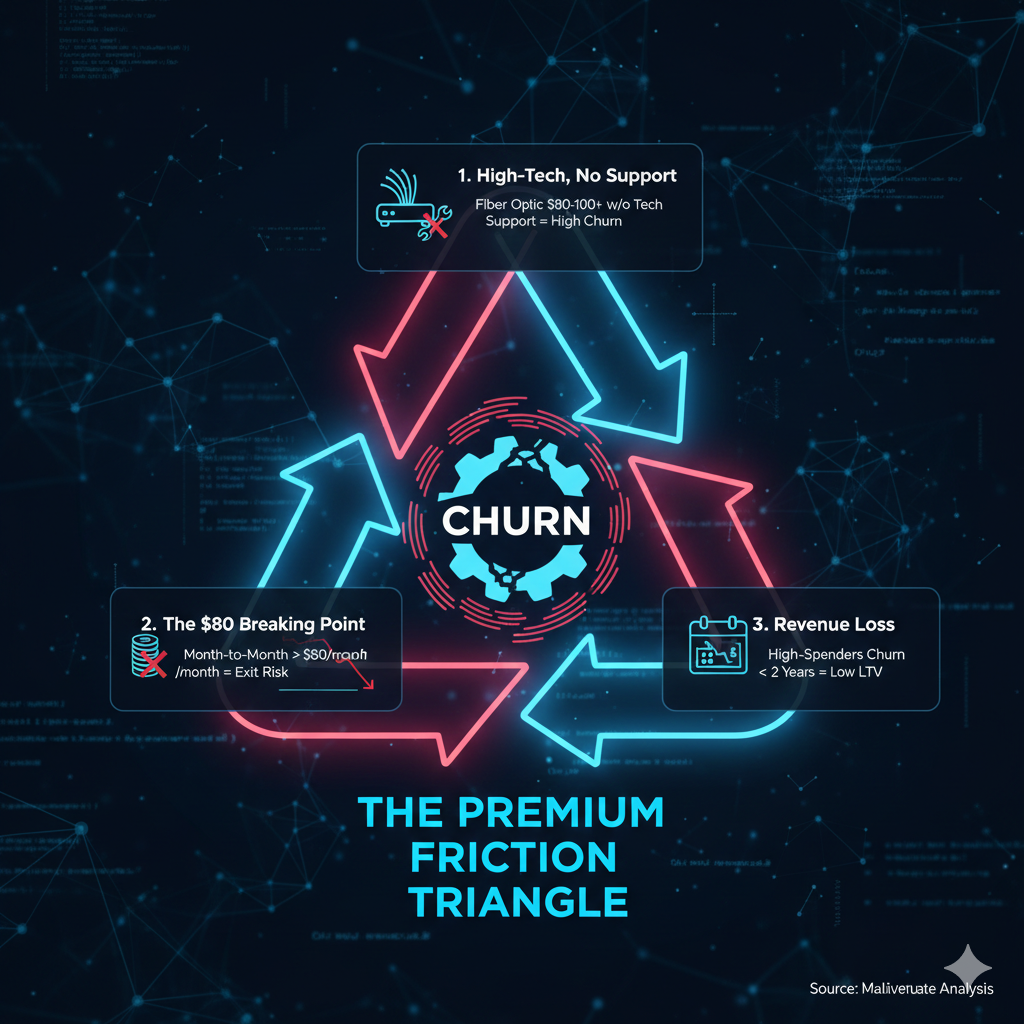

*Ilustrarion of the pain point. Image created with Nano Banana*

## **Recomendation plan**

After conducting a deep comprehensive Exploratory Data Analysis (EDA), the evidence suggests that churn is not a random event. Instead, it is a predictable outcome of financial friction, unjustified pricing gaps, and a lack of service integration and support during the critical first year. Based on the uncovered insights the final recommendations for the business are:

**1. Mandatory tech support:** 24/7 tech support via whatsapp to make sure that the customer´s problem is never unatended regardless the hour of the day. To be able to do this, an AI automation is created with tools like n8n. The AI agent is trained with the company´s internal information, troubleshooting guide, tech information, etc. In order to know deeply the tech that the company offers and be able to respond to any question that the customer might ask and guide the process of troubleshooting. In case that the customer needs specialized help or the problem cannot be solved via whatsapp, the customer can request a visit from one of the company´s experts in the same chat, and schedule the time as well. 

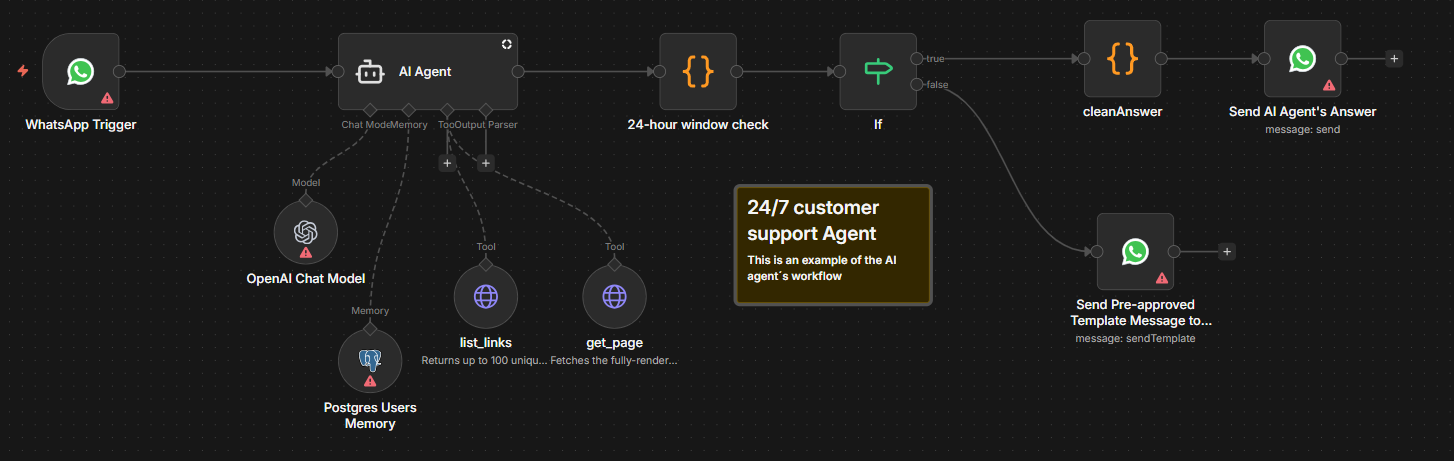

*n8n workflow of a 24/7 customer support AI agent*

**2. Getting out of the "red ocean":** The company must avoid entering a price competition with its competitors. Instead, provide more value for the price that the customer is paying for, that way the customer doesn´t feel that is paying an overpriced service and feel that their money is well spent. Some recommendations are:
- Teleworker Plans: Packages that include an automatic second backup line (4G/5G) if the fiber fails.
- Gamer Packages: Traffic prioritization for specific game servers and high-performance hardware.
- Residential Cybersecurity: Include built-in protection against malware and advanced parental controls directly at the router level.
- Included Mesh Wi-Fi: Instead of just installing a basic router, provide Wi-Fi Mesh solutions to guarantee total coverage in every corner of the home or office.
- Static IP and Cloud Solutions: For the business sector, offer services that simplify server setup or secure cloud storage integration.

**3. Fidelization rewards:** This will make the customer feel valued and satisfied, the rewards must be pivoted in the improvement of their conectivity and in tangible perks that don´t necessarily require to decrease the price of the service:
- Next-Gen Router Upgrades: Offer free upgrades to the latest standards (like Wi-Fi 7) for customers with 2+ years of seniority.
- Annual Connectivity Tune-up: Offer a free yearly professional "health check" for their home network to optimize performance and clean fiber connections.
- Streaming & Security Credits: Provide points redeemable for subscriptions to platforms like Netflix or premium antivirus licenses.
- Referral Bonuses: Reward existing customers with a free month of service for every new subscriber they bring to the company.
- Exclusive Event Access: Priority access or free tickets to local events sponsored by the company, such as gaming tournaments or concerts.
- "Fast Pass" Technical Support: Long-term customers get "front-of-the-line" priority to priority maintenance appointments scheduled in less than 12 hours.


**4. Build-Measure-learn:** Execute the recommendation plan, measure how the customers respond, learn whether to pivot or persevere. The company should be geared to accelerate that feedback loop.




### **Proposed Experimental Design (A/B Testing Framework)**

After identifying the **"Premium Friction Triangle"** in the EDA and building a predictive model, we must validate our business strategies. Following the Lean Startup methodology, the company must not roll out changes blindly; instead, it should use a **Build-Measure-Learn** loop through a controlled experiment.

**1. Hypothesis Formulation**
To address the high churn in the Fiber Optic segment, we propose the following:

* **Null Hypothesis ($H_0$):** Implementing 24/7 AI-driven Tech Support via WhatsApp has no significant effect on the churn rate of Fiber Optic customers.
* **Alternative Hypothesis ($H_1$):** Fiber Optic customers with access to AI-driven Tech Support will show a significantly lower churn rate (at least a 15% reduction) compared to the control group.

**2. Experimental Setup: The A/B Test**
We will conduct a **Randomized Controlled Trial (RCT)** to ensure statistical integrity:

* **Target Population:** Customers identified by our Machine Learning model as "High Risk" (Churn Probability > 0.7) who are currently using **Fiber Optic** services.
* **Group A (Control):** This group continues with the standard service and existing support channels.
* **Group B (Treatment):** This group receives an invitation to a new "Priority AI Support" channel via WhatsApp, powered by an automation (e.g., n8n) trained on internal troubleshooting guides.



**3. Key Performance Indicators (KPIs)**
To determine the success of our **Blue Ocean Strategy**, we will track:

1.  **Primary Metric - Churn Rate Reduction:** The percentage difference in cancellations between Group A and Group B over a 90-day window.
2.  **Secondary Metric - Time-to-Resolution:** Average time to solve technical issues via the AI agent vs. traditional phone support.
3.  **Financial Metric - ROI of Retention:** Comparison of the revenue saved by retaining $80-$100/month customers versus the operational cost of the AI infrastructure.

**4. Statistical Rigor**
* **Confidence Level:** 95% ($\alpha = 0.05$).
* **Sample Size:** Determined by Power Analysis to ensure the result is not due to random chance.
* **Duration:** Minimum of 30 days to capture a full billing cycle, where "eCheck" and "Monthly Charge" friction is most prevalent.

**5. Strategic Decision (The Lean Feedback Loop)**
Based on the results, the company will decide:
* **Persevere:** If churn drops significantly, scale the AI Support to all high-value segments.
* **Pivot:** If churn remains high but customer satisfaction (NPS) improves, adjust the "Blue Ocean" offering (e.g., testing the **Gamer Package** or **Cybersecurity bundle** instead).
* **Stop:** If no change is observed, re-evaluate the pricing model and the "First-Year" onboarding experience.


## **Modeling Strategy: Balancing Predictability and Interpretability**

The EDA revealed that high-value customers on Fiber Optic are at high risk. To move from Reactive to Proactive retention, I will now develop a Predictive Model. This model aims to identify 'At-Risk' individuals with high accuracy, allowing the business to apply the previously mentioned 'Blue Ocean' strategies specifically to those who need them most.

### **Data preprocessing for ML**

Before any prediction model is created, the pre processing is needed. In order to do that i create dummy variables with label encoding for the variables with two categories, and One-hot encoding for the ones that have more:

**1. Label encoding:**
- Partner (Yes = 1, No = 0)
- Dependents (Yes = 1, No = 0)
- Paperless billing (Yes = 1, No = 0)
- Phone service (Yes = 1, No = 0)

In [27]:
condition = {'Yes': 1, 'No': 0}

label_cols = ['partner', 'dependents', 'phone_service', 'paperless_billing']

for col in label_cols:
    churn[col] = churn[col].map(condition)
    
# Verifying the changes
churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


**2. One hot encoding (dummy variables):**
- Contract (Month-to-month, One year, Two year)
- Payment method (electronic check, mailed check, bank transfer, credit card)
- Multiple lines (Yes, No, No phone service)
- Internet service (Fiber optic, DSL, No internet service)
- Online security (Yes, No, No internet service)
- Online backup (Yes, No, No internet service)
- Device protection (Yes, No, No internet service)
- Tech support (Yes, No, No internet service)
- Streaming tv (Yes, No, No internet service)
- Streaming movies (Yes, No, No internet service)

In [28]:
# Columns for one-hot encoding
cols_to_encode = ['contract', 'payment_method', 'multiple_lines', 'internet_service',
                  'online_security', 'online_backup', 'device_protection', 'tech_support',
                  'streaming_tv', 'streaming_movies']

churn_dummies = pd.get_dummies(churn[cols_to_encode], drop_first=True)

for col in churn_dummies.columns:
    churn_dummies[col] = churn_dummies[col].map({True: 1, False: 0})

churn_dummies.head()

,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,multiple_lines_No phone service,multiple_lines_Yes,internet_service_Fiber optic,internet_service_No,online_security_No internet service,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
0,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Once the columns have been encoded, i´ll create a single dataset with the columns and scale the numeric columns in order to have a clean dataset ready for machine learning modelling

In [29]:
churn_labels = churn[['partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']]
churn_dummies = pd.concat([churn_dummies, churn_labels], axis=1)

In [30]:
cols_num = churn[['tenure', 'monthly_charges', 'total_charges', 'senior_citizen']]
churn_dummies = pd.concat([cols_num, churn_dummies], axis=1)

In [31]:
# Columns of the final dataframe
churn_dummies.columns

Index(['tenure', 'monthly_charges', 'total_charges', 'senior_citizen',
       'contract_One year', 'contract_Two year',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn'],
      dtype='object')

In [32]:
display(churn_dummies.head())

,tenure,monthly_charges,total_charges,senior_citizen,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,multiple_lines_No phone service,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,partner,dependents,phone_service,paperless_billing,churn
0,1,29.85,29.85,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,53.85,108.15,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1


In [33]:
# Selection of the data
X = churn_dummies.drop('churn', axis=1)
y = churn_dummies['churn']

# total charges has missing values that must be removed
X = X.dropna() 
y = y[X.index]

print(X.shape, y.shape)

(7032, 29) (7032,)


In [34]:
# Scaling the necessary features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X.loc[:, ['tenure', 'monthly_charges', 'total_charges']] = scaler.fit_transform(X.loc[:, ['tenure', 'monthly_charges', 'total_charges']])

/tmp/ipython-input-160450828.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.28024804  0.06430269 -1.23950408 ... -0.87280842 -1.15801615
  1.36810945]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, ['tenure', 'monthly_charges', 'total_charges']] = scaler.fit_transform(X.loc[:, ['tenure', 'monthly_charges', 'total_charges']])


### **Classification model**

To ensure the best predictive power, I will perform a benchmark between **Logistic Regression (representing linear simplicity)** and **Random Forest (representing non-linear complexity)**. My goal is to find the model that maximizes Recall, as failing to identify a churner is more costly for the business than offering a retention benefit to a loyal customer.

In [35]:
from sklearn.model_selection import train_test_split # Splitting the data into training and testing sets
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,roc_auc_score, RocCurveDisplay # Metrics for model evaluation

random_state = 42 # Seed for reproducibility

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=random_state,
                                                    stratify=y)

In [37]:
# Function definition: Model evaluation and comparison
logreg = LogisticRegression(random_state=random_state)
rf = RandomForestClassifier(random_state=random_state)

def evaluate_model(X_test, y_test):
    models = [logreg, rf]
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'classification report from {model}',classification_report(y_test, y_pred),sep='\n')
        print(confusion_matrix(y_test, y_pred))

In [38]:
# Function definition: Plot ROC curve for both models
def plot_roc_curve(X_test, y_test, logreg, rf):
    models = [{'label': 'Logistic Regression', 'model': logreg},
              {'label': 'Random Forest', 'model': rf}]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    for model in models:
        # Probabilities
        y_probs = model['model'].predict_proba(X_test)[:, 1]
        
        # AUC score
        auc_score = roc_auc_score(y_test, y_probs)
        
        # Plot the curve in the same axis
        RocCurveDisplay.from_estimator(model['model'], X_test, y_test,
                                       ax = ax,
                                       name = model['label'])
    
    # Reference line for random classifier
    ax.plot([0, 1], [0, 1], 'k--', label='Baseline (Random)')

    ax.set_title('ROC Curve Comparison')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(alpha=0.3)
    plt.show()

In [39]:
# Evaluation of both models
evaluate_model(X_test, y_test)

classification report from LogisticRegression(random_state=42)
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

[[917 116]
 [159 215]]
classification report from RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[919 114]
 [182 192]]


After fitting and running both machine learning models, the predictive power of the logistic regression is better. Not only it has a better accuracy, more importantly, is has better **Recall**. This is important because it detects better the customer churn.

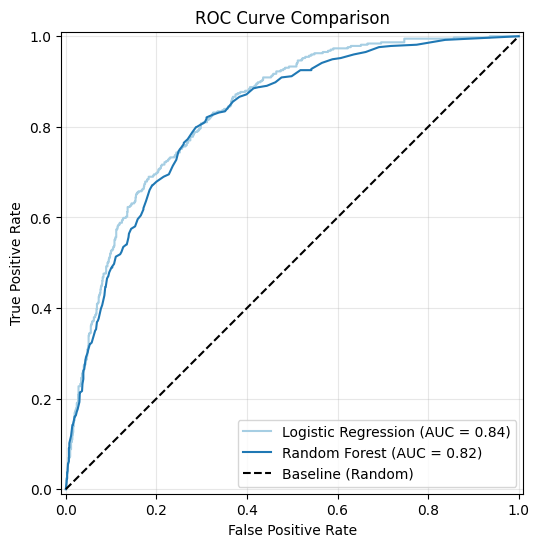

In [40]:
# Plotting ROC curves for both models
plot_roc_curve(X_test, y_test, logreg, rf)

The AUC of the logistic regression is slightly better in the Logistic regression model, and its curve its consistenly over the Random Forest curve. This shows that the linear model splits better the customer that leave the company and the ones who doesn´t.

Based on the experimental evidence, Logistic Regression is selected as the final production model. It provides a 14% higher detection rate (Recall) for churners compared to the optimized Random Forest. This choice aligns with the business objective of maximizing retention opportunities while maintaining a transparent and interpretable model for stakeholders.

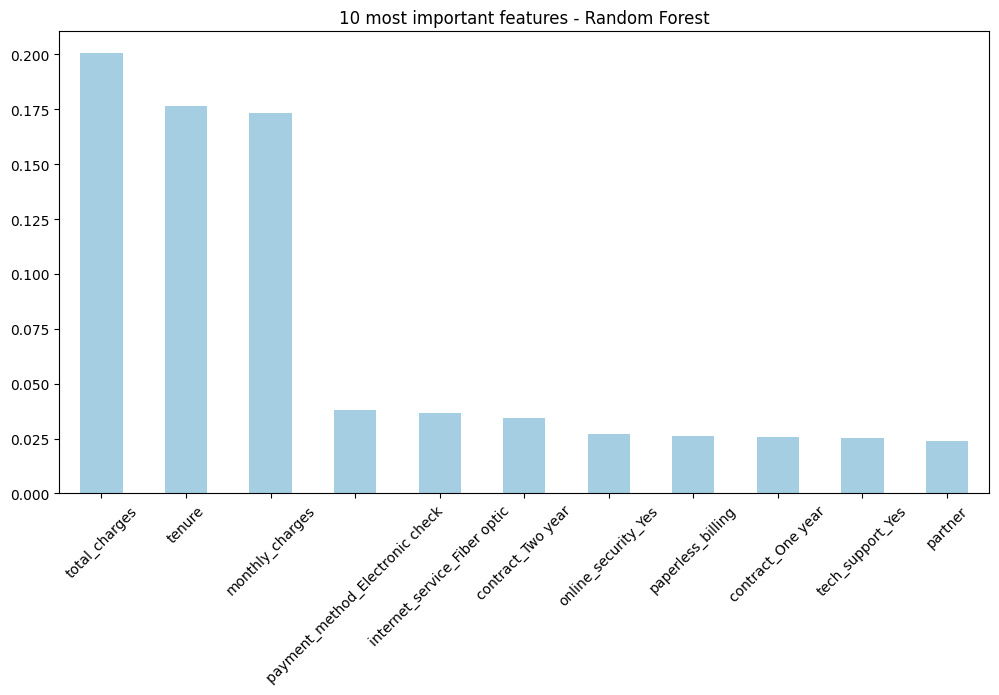

In [41]:
# 10 most important features from Random Forest
importances_rf = pd.Series(rf.feature_importances_, index=X_test.columns)
sorted_importances_rf = importances_rf.sort_values(ascending=False)[0:11]
sorted_importances_rf.plot(kind='bar', figsize=(12,6), title='10 most important features - Random Forest')
plt.xticks(rotation=45)
plt.show()

This plot shows the most important features that provides the most predicting power to predict customer churn, and confirms the analysis perform in the EDA. Customer churn is highly related with the tenure that the customer has with in the company, as well as the amount of money that is paying for the service that they signed up for.

### **Model Optimization: Hyperparameter Tuning**

At this stage, although the **Logistic Regression** showed a higher initial Recall (0.57), the **Random Forest** has a more complex architecture that could potentially capture deeper non-linear patterns in the data. 

To ensure no predictive power is left on the table, I will perform **Hyperparameter Tuning** using `RandomizedSearchCV`. 

**The Goal of Optimization**


In Churn problems, the cost of a **False Negative** (failing to detect a customer who leaves) is much higher than a **False Positive** (offering a discount to someone who stays). Therefore, our optimization strategy will specifically target **Recall** for the churn class.

**Search Strategy:**

* **Algorithm:** Random Forest Classifier.
* **Method:** Randomized Search with 3-fold Cross-Validation.
* **Parameters tuned:** `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Definimos el espacio de búsqueda (Hyperparameter Grid)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=15, 
    cv=3, 
    scoring='recall', 
    random_state=42,
    n_jobs=-1
)
# Fit the model
rf_random.fit(X_train, y_train)

# Optimized model extraction
best_rf = rf_random.best_estimator_

# Displaying the best parameters
print(f"Best parameters: {rf_random.best_params_}", sep = '\n')

Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


classification report from LogisticRegression(random_state=42)
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

[[917 116]
 [159 215]]
classification report from RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[926 107]
 [187 187]]


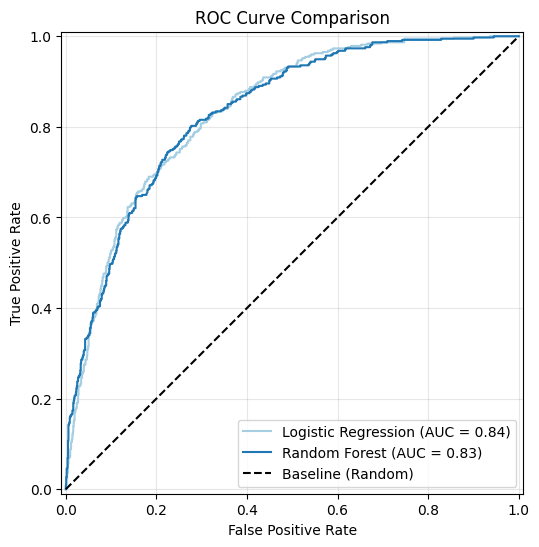

In [44]:
# Evaluation of the optimized model
def evaluate_optimized_model(X_test, y_test):
    models = [logreg, best_rf]
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'classification report from {model}',classification_report(y_test, y_pred),sep='\n')
        print(confusion_matrix(y_test, y_pred))
        
evaluate_optimized_model(X_test, y_test)
plot_roc_curve(X_test, y_test, logreg, best_rf)

Even after optimization, the Logistic Regression maintained superior performance in detecting churners. Following the principle of Parsimony, I will proceed with the simpler **Logistic regression model** for the final implementation, as it provides better results with lower complexity.

## **Final conclusion**

The modeling phase confirms that customer churn is primarily driven by financial friction and service type. By selecting the Logistic Regression model, we achieve a Recall of 0.57, providing the business with the highest capability to intervene before a high-value Fiber Optic customer leaves. The alignment between the data's feature importance and our Blue Ocean Strategy ensures that our proposed solutions (AI Support and Value Bundles) attack the root causes of dissatisfaction identified by the algorithm

## **Model Deployment**

To complete the data lifecycle, this section outlines how the **Logistic Regression** model would transition from this Jupyter Notebook to a production-ready environment. The goal is to transform static predictions into an automated, real-time retention engine.

**1. Deployment Architecture: From Model to API**

The model will be served as a **Rest-API** to allow other company systems (CRM, Web App, Customer Support Dashboard) to consume predictions.

* **Model Serialization:** We will export the final Logistic Regression pipeline using `joblib`. This includes not only the model but also the scalers and encoders used in the preprocessing phase to ensure data consistency.
* **API Development:** I recommend using **FastAPI** due to its high performance and native support for asynchronous requests, ideal for real-time scoring.
* **Containerization:** The application will be wrapped in a **Docker** container. This guarantees that the model runs in the exact same environment (Python version, libraries) regardless of the cloud infrastructure used.



**2. Real-Time Integration & Automation (The n8n Workflow)**
Instead of batch processing, we will trigger actions based on specific customer events identified as high-risk in our EDA:

* **Trigger:** A webhook in **n8n** monitors the database. When a customer changes their contract to "Month-to-month" or switches to "Electronic Check", the workflow triggers.
* **Scoring:** The customer data is sent to our FastAPI endpoint.
* **Action:** If the probability of churn is > 0.7, n8n executes a "Retention Playbook":
    * It notifies the specialized support team via Slack/Teams.
    * It sends a personalized WhatsApp message offering the **Blue Ocean** "Tech Support Priority" or a specific "Value Bundle".

**3. MLOps: Monitoring & Model Maintenance**
Machine Learning models require constant supervision to ensure they remain relevant as market conditions change.

* **Drift Detection:** We will monitor "Feature Drift" (if customer behavior changes) and "Concept Drift" (if the relationship between features and Churn changes, such as a price hike in Fiber Optic).
* **Performance Tracking:** A dashboard in **Grafana** will track our real-world **Recall**. If the model’s ability to detect churners drops below our 0.57 baseline, an alert is triggered.
* **Automated Retraining:** A pipeline will be set up to retrain the model every 3 months using the most recent data, ensuring the coefficients stay aligned with the latest consumer trends.

**4. Proposed Tech Stack**
| Component | Technology |
| :--- | :--- |
| **Orchestration** | n8n / Apache Airflow |
| **Model API** | FastAPI / Uvicorn |
| **Containerization** | Docker |
| **Monitoring** | Prometheus & Grafana |
| **Cloud Infrastructure** | AWS (SageMaker) / Google Cloud (Vertex AI) |